測試資料
---
1. Download data, 如何下載資料
- Using Database by Pandas, 如何使用資料庫
- Technical Index Introducing, 引進技術指標
- TSM as example, 用台積電當例子
- Use pycaret to make prediction models for popular known machine learning schemes.

Note
---
1. has to install all the required packages, for instance, talib. install by pip:
```
> pip install yfinance
```
- Complete the case.

- (2020/09/30) Use pycaret, test all the prediction schemes,
- (...)

Date: 2020/09/23

- put all the python files in same directory.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import matplotlib.dates as dates
#import pandas_datareader.data as web
from pandas_datareader import data as web
import datetime as dt
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from hmmlearn.hmm import GaussianHMM
import yfinance as yf
yf.pdr_override()

In [2]:
from datetime import date
today = date.today()

In [3]:
# Observe recent changes

start = dt.datetime(2019, 1, 1)
end = today

In [4]:
AAPL='AAPL'
AAPL_t='蘋果'

TSM='2330.TW'
TSM_t='台積電'
MediaT='2454.TW'
MediaT_t='聯發科'
Macronix='2337.TW'
Macronix_t='旺宏電子'

In [5]:
def get_stock(target,start,end):
    df=web.get_data_yahoo([target],start, end)
    df.fillna(method='ffill',inplace=True)
    df.fillna(method='bfill',inplace=True)
    return df

In [7]:
df_AAPL=web.get_data_yahoo([AAPL],start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df_TSM=web.get_data_yahoo([TSM],start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df_TSM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 2019-01-02 to 2020-10-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       429 non-null    float64
 1   High       429 non-null    float64
 2   Low        429 non-null    float64
 3   Close      429 non-null    float64
 4   Adj Close  429 non-null    float64
 5   Volume     429 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.5 KB


In [8]:
y=df_TSM['Close'].shift(-1).values
#y[0]=y[1]
#df_TSM['y']=y

In [9]:
y[-1]=y[-2]
df_TSM['y']=y

In [15]:
df_TSM.tail()

,Open,High,Low,Close,Adj Close,Volume,y
Date,,,,,,,
2020-09-30,430.5,435.0,430.5,433.0,433.0,27334204,432.5
2020-10-05,438.0,438.0,431.5,432.5,432.5,32945832,439.5
2020-10-06,441.5,442.0,437.5,439.5,439.5,35775395,443.0
2020-10-07,435.0,445.0,435.0,443.0,443.0,42926239,453.0
2020-10-08,450.0,454.0,448.5,453.0,453.0,60853811,453.0


In [10]:
from pycaret.regression import *

In [17]:
df_TSM.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'y'], dtype='object')

In [11]:
features=['Open', 'High', 'Low', 'Close', 'Volume', 'y']

In [13]:
# predict for next 5 days, next week 
ratio=-5
train=df_TSM.iloc[:ratio,:]
test=df_TSM.iloc[ratio:,:]

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424 entries, 2019-01-02 to 2020-10-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       424 non-null    float64
 1   High       424 non-null    float64
 2   Low        424 non-null    float64
 3   Close      424 non-null    float64
 4   Adj Close  424 non-null    float64
 5   Volume     424 non-null    int64  
 6   y          424 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 26.5 KB


In [25]:
setup?

In [20]:
clf = setup(data = train[features], target = features[-1],train_size=0.8,normalize=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6427
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(424, 6)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Orthogonal Matching Pursuit,3.7600,28.1439,5.1567,0.9922,0.0168,0.0126,0.0066
1,TheilSen Regressor,3.8134,28.8454,5.2082,0.9920,0.0170,0.0128,1.5823
2,Least Angle Regression,3.8225,29.9353,5.3023,0.9917,0.0172,0.0128,0.0106
3,Huber Regressor,3.8170,30.1268,5.3034,0.9917,0.0172,0.0127,0.0558
4,Linear Regression,3.8220,30.2205,5.3336,0.9916,0.0172,0.0128,0.0150
5,Lasso Regression,3.8408,30.7327,5.3745,0.9916,0.0174,0.0128,0.0096
6,Bayesian Ridge,3.8173,30.3438,5.3485,0.9916,0.0173,0.0128,0.0084
7,Random Sample Consensus,3.8220,30.2205,5.3336,0.9916,0.0172,0.0128,0.0155
8,Ridge Regression,3.8738,31.5057,5.4917,0.9913,0.0177,0.0130,0.0096
9,CatBoost Regressor,4.2832,34.0315,5.7392,0.9908,0.0188,0.0144,0.6922


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [22]:
clf_rf = create_model('rf')
tuned_rf = tune_model(clf_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.6706,77.5137,8.8042,0.9788,0.0252,0.0146
1,3.8779,24.0958,4.9087,0.9936,0.0157,0.0129
2,4.2665,41.3610,6.4313,0.9907,0.0220,0.0145
3,4.6907,38.3530,6.1930,0.9914,0.0192,0.0152
4,4.1757,27.2359,5.2188,0.9914,0.0190,0.0152
5,3.8061,22.6200,4.7560,0.9929,0.0164,0.0130
6,3.4978,19.5866,4.4257,0.9903,0.0159,0.0125
7,4.1617,27.7719,5.2699,0.9933,0.0168,0.0140
8,3.6995,21.2551,4.6103,0.9946,0.0150,0.0120
9,4.3892,33.9508,5.8267,0.9930,0.0197,0.0151


In [26]:
predict_clf=predict_model(tuned_rf,data=test[features])
oop=predict_clf['Label'].values

In [27]:
len(oop),len(test)

(5, 5)

In [28]:
test['pred']=oop

<AxesSubplot:xlabel='Date'>

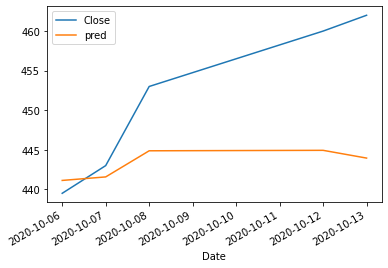

In [29]:
test[['Close','pred']].plot()

In [30]:
import plotly.express as ex

In [31]:
ex.line(test[['Open','High','Low','Close','pred']])

In [8]:
df_TSM.to_csv("csv/TSM.csv")

In [ ]:
df_MediaT=web.get_data_yahoo([MediaT],start, end)

In [ ]:
df_Macronix=web.get_data_yahoo([Macronix],start, end)

In [ ]:
len(df_AAPL),len(df_TSM)

In [ ]:
df=df_AAPL[['Close']].copy()

In [ ]:
df.rename(columns={'Close':'AAPL'},inplace=True)


In [ ]:
df['TSM']=df_TSM['Close']

In [ ]:
df.fillna(method='bfill',inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.plot(figsize=[12,6])

In [ ]:
(df/df.iloc[0]).plot(figsize=[12,6],title="Profit, $p_i/p_{i-1}$");

In [ ]:
Return=np.log(df/df.shift(1))
Return=Return.dropna()


Return.hist(bins=25,figsize=(12,4));

Execellent visualization, right? But we can  do this better by plotly!

In [ ]:
Return.hist?

In [ ]:
pd.options.plotting.backend ="plotly"

In [ ]:
Return.plot(kind="hist", opacity=0.6, bins=25,title=" Returrns of Comanies")

As expected, more flexibly than matplotlib redering. You can try other otionals: 
```
histnorm='probability density',
marginal='box',
```

In [ ]:
Ret_mean=Return.mean()*252
Ret_mean

In [ ]:
Ret_cov=Return.cov()*252
Ret_cov

In [ ]:
Ret_cor=Return.corr()
Ret_cor

In [ ]:
x=np.random.random(len(df.columns))
w=x/x.sum()
w

In [ ]:
R_Bin=np.sum(w*Ret_mean)
R_Bin

In [ ]:
vol_Bin=np.sqrt(np.dot(w,np.dot(Ret_cov,w.T)))
vol_Bin

In [ ]:
print("Portfolio: ",list(df.columns))

print("Weights: %6.4f, %6.4f" %(w[0],w[1]))

print("Profit, %6.4f, with volatility, %6.4f" %(R_Bin,vol_Bin))